# 1-import des packages et des donnees

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
df=pd.read_csv('/kaggle/input/boston-price-dataset/Boston.csv',index_col=0)
df.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
# renommer les colones
df.columns=['Taux_criminalite','Prop_terrains_resid','Prop_acres_indus','Bordure_riviere','Concentration_NO2','Nb_pieces',
            'Prop_log_construits_av1940','Dist_ponderee_emploi','Acces_autoroute','Taux_impot_fonciers','Rati_eleve_prof',
            'Prop_noirs_ville','Pourcentage_pop_inf','Valeur_med_logement']

In [4]:
df.head()

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces,Prop_log_construits_av1940,Dist_ponderee_emploi,Acces_autoroute,Taux_impot_fonciers,Rati_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# 2-Analyses generales et univariees

In [5]:
df.describe(include='all')

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces,Prop_log_construits_av1940,Dist_ponderee_emploi,Acces_autoroute,Taux_impot_fonciers,Rati_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# variables et types de donnees
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Taux_criminalite            506 non-null    float64
 1   Prop_terrains_resid         506 non-null    float64
 2   Prop_acres_indus            506 non-null    float64
 3   Bordure_riviere             506 non-null    int64  
 4   Concentration_NO2           506 non-null    float64
 5   Nb_pieces                   506 non-null    float64
 6   Prop_log_construits_av1940  506 non-null    float64
 7   Dist_ponderee_emploi        506 non-null    float64
 8   Acces_autoroute             506 non-null    int64  
 9   Taux_impot_fonciers         506 non-null    int64  
 10  Rati_eleve_prof             506 non-null    float64
 11  Prop_noirs_ville            506 non-null    float64
 12  Pourcentage_pop_inf         506 non-null    float64
 13  Valeur_med_logement         506 non-null

## Analyses univariees

### Analyse des distributions des variables

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


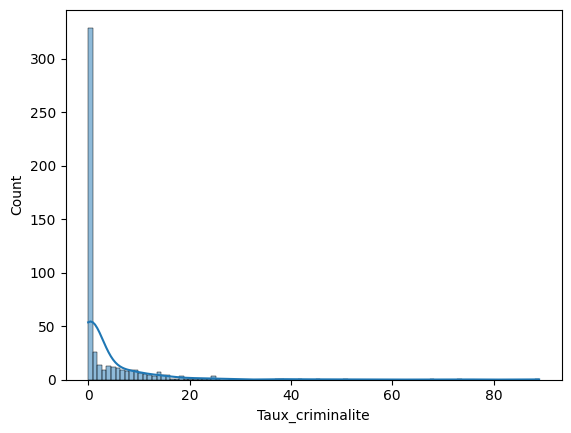

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


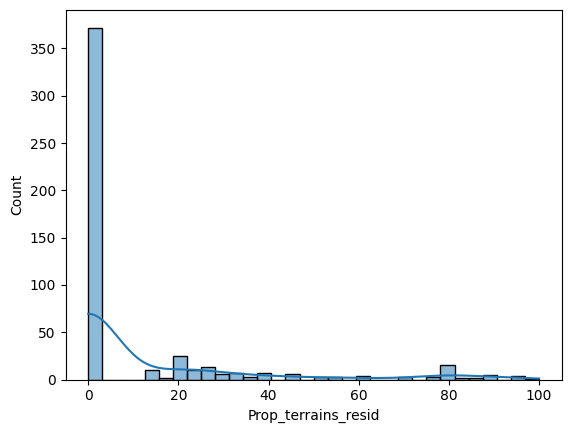

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


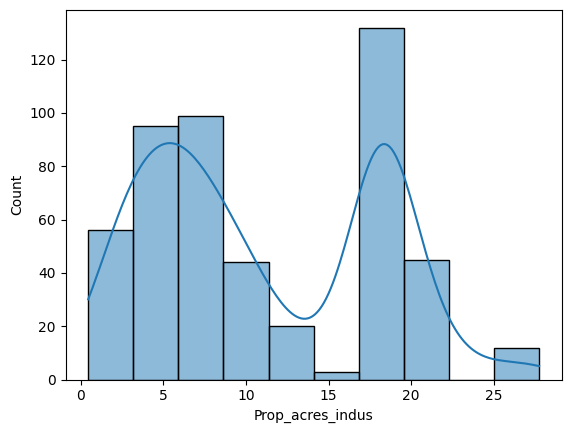

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


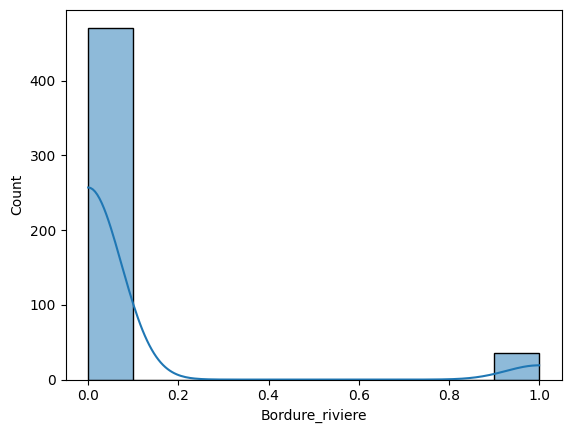

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


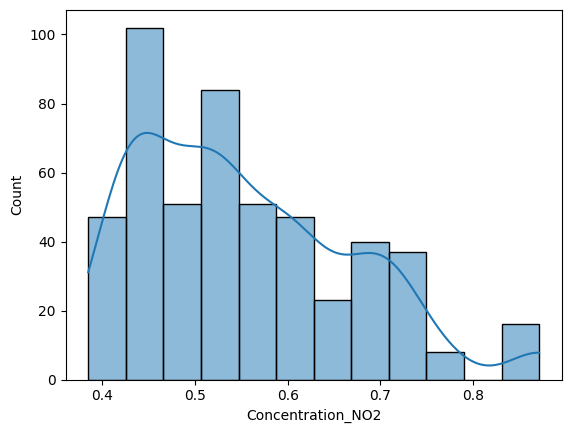

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


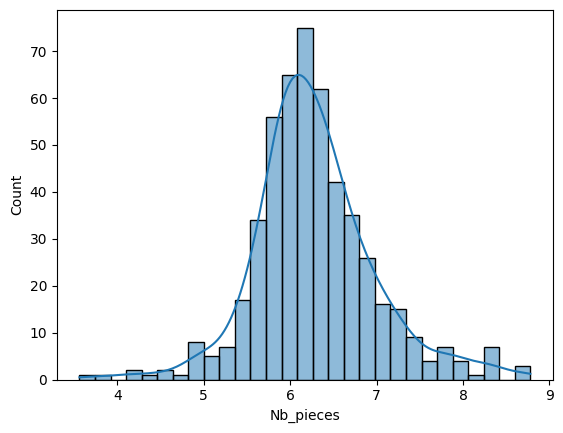

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


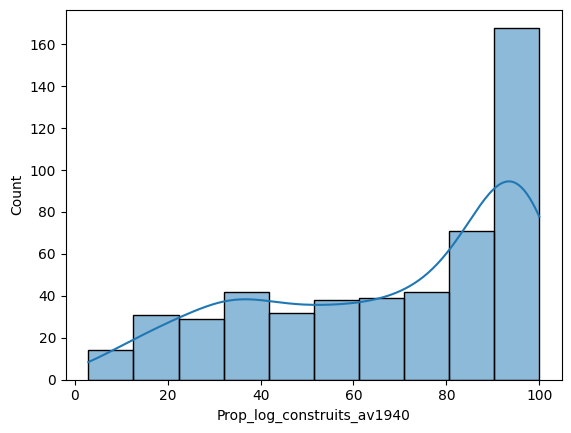

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


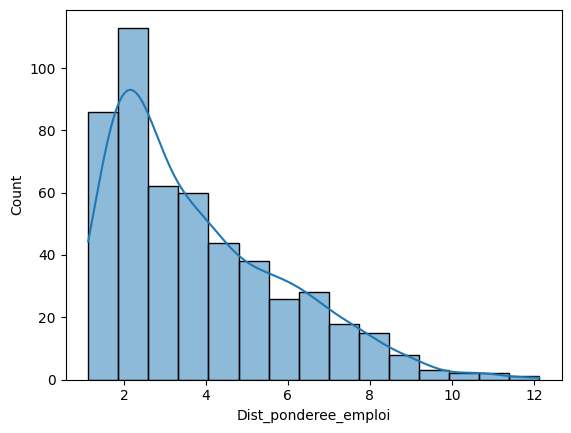

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


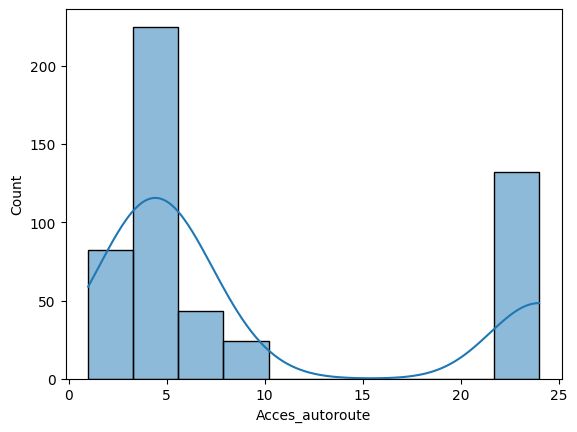

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


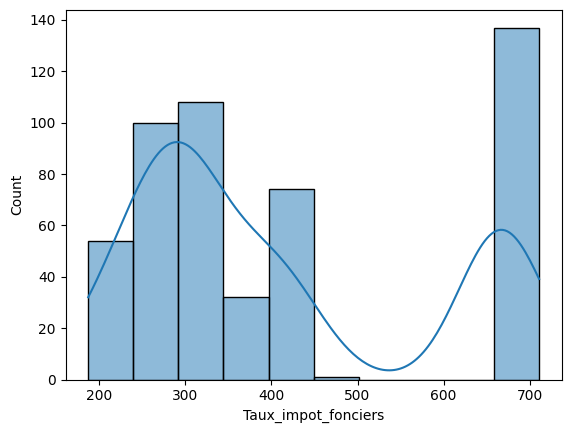

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


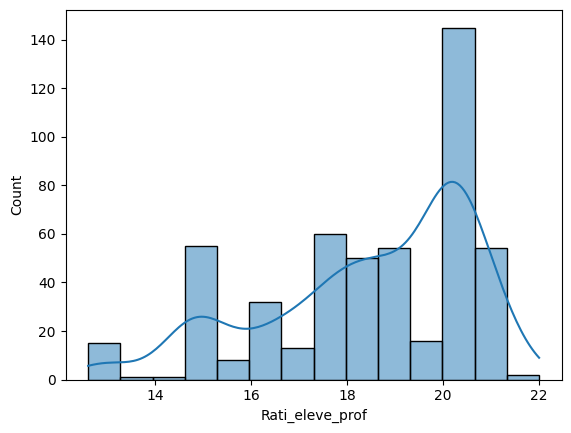

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


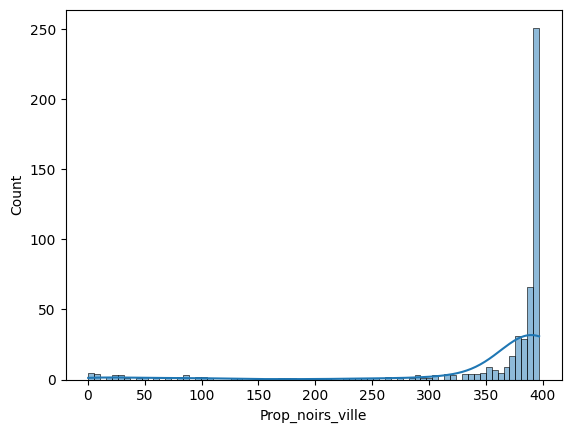

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


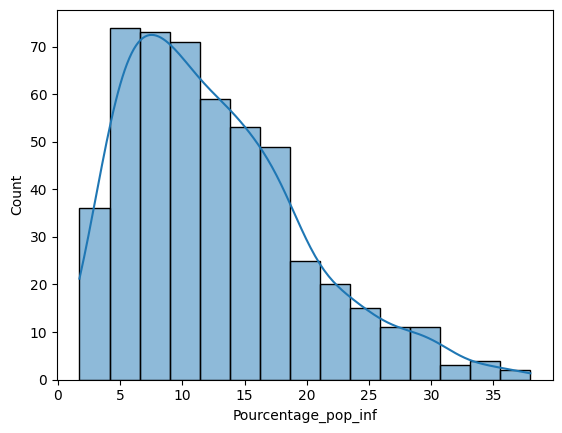

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


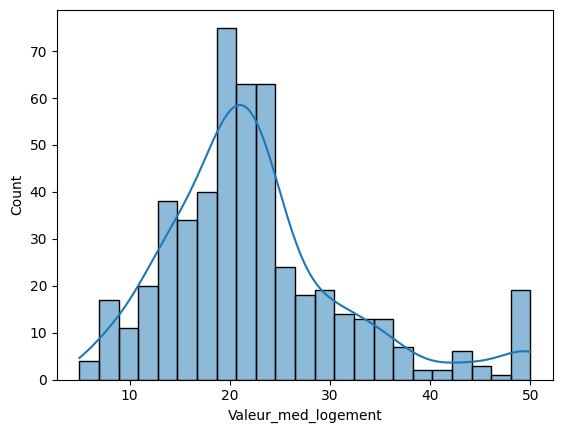

In [7]:
# analyses graphiques
for i in df.columns:
    sns.histplot(df[i],kde=True)
    plt.show()

### hypotheses:
les variables <b>Nb_pieces</b> et <b>Valeur_med_logement</b> semblent suivre une distribution normale

In [8]:
# test de verification de la normalite des variables
import scipy.stats as stats
for i in ['Nb_pieces','Valeur_med_logement']:
    statistic,p_value =stats.shapiro(df[i])
    print(f"P-valeur de la normalité (Shapiro-Wilk) pour {i}:", p_value)
    
# Test de Kolmogorov-Smirnov à un échantillon
print(stats.kstest(df['Nb_pieces'],'norm'))
print(stats.kstest(df['Valeur_med_logement'],'norm'))

P-valeur de la normalité (Shapiro-Wilk) pour Nb_pieces: 2.4107271734408187e-10
P-valeur de la normalité (Shapiro-Wilk) pour Valeur_med_logement: 4.939965499209636e-16
KstestResult(statistic=0.9998152774582629, pvalue=0.0, statistic_location=3.561, statistic_sign=-1)
KstestResult(statistic=0.9999997133484281, pvalue=0.0, statistic_location=5.0, statistic_sign=-1)


### Conclusion : les variables ne suivent pas une distribution normale

# 3-Analyses bivariees

In [9]:
# analyses de correlations
# sns.pairplot(df)
# trop toufu

## analyses des correlation entre la target et les features

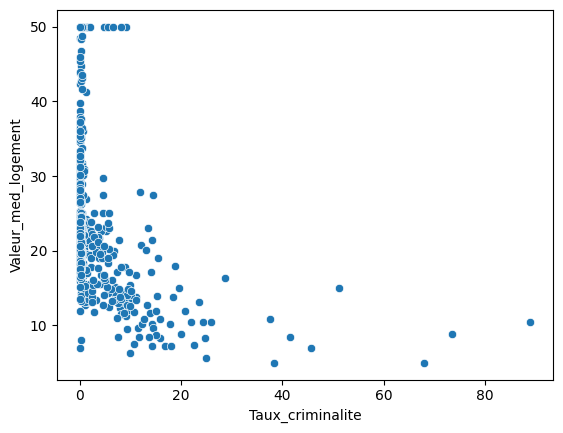

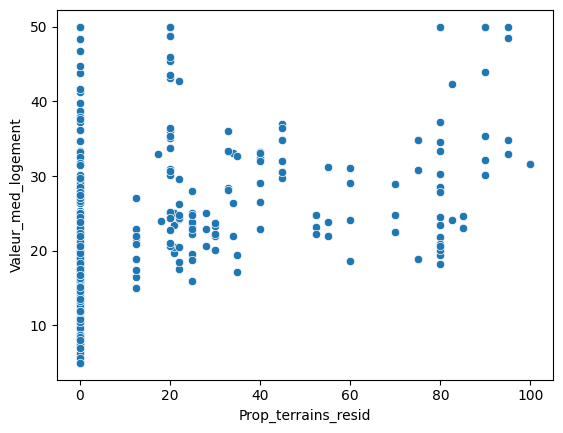

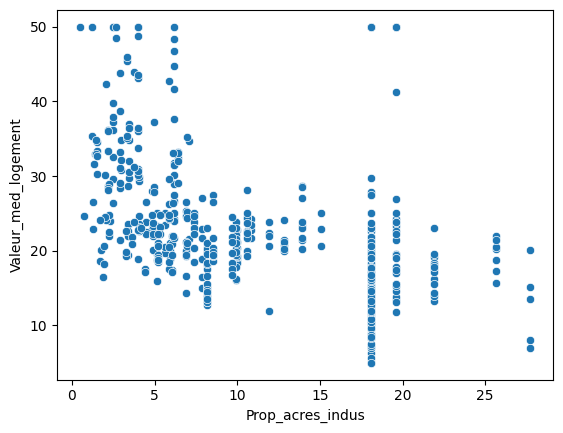

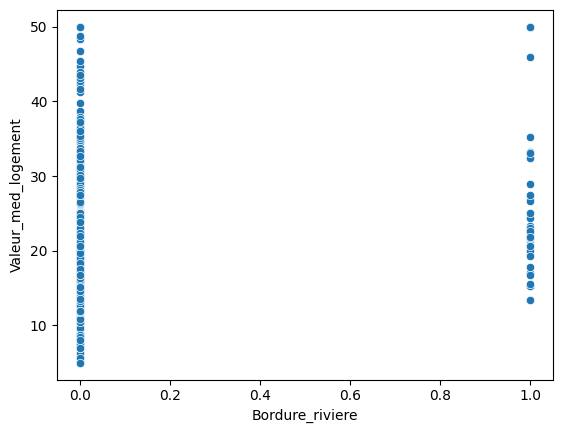

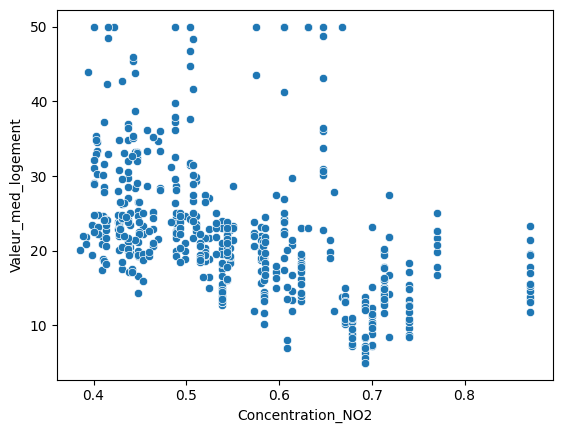

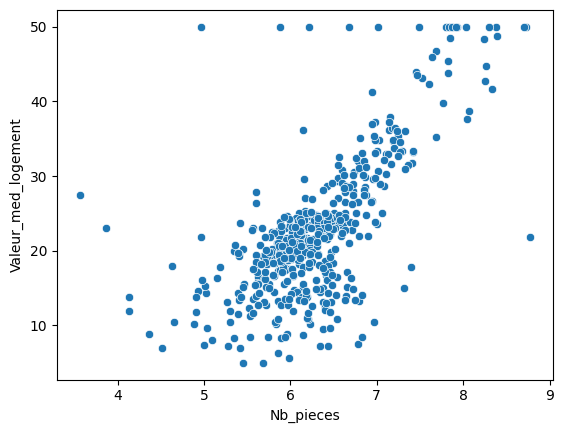

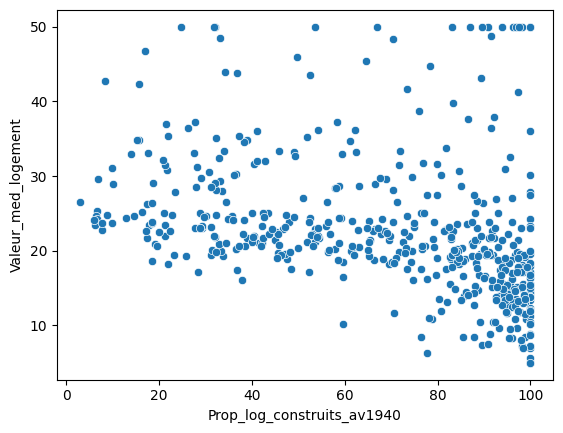

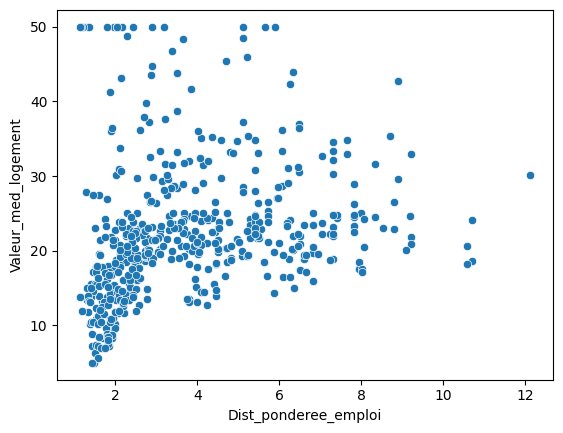

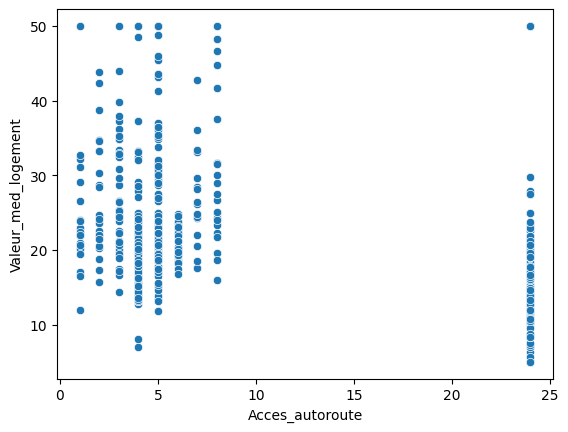

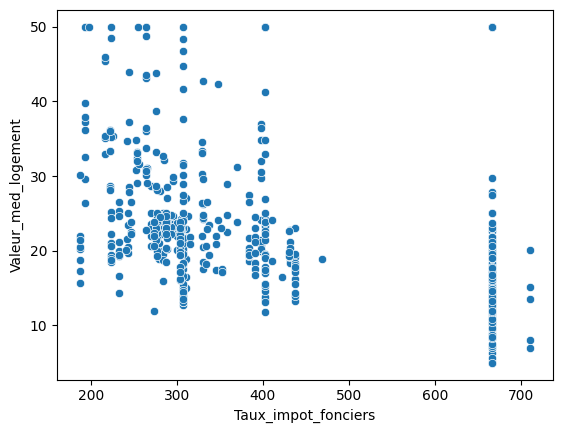

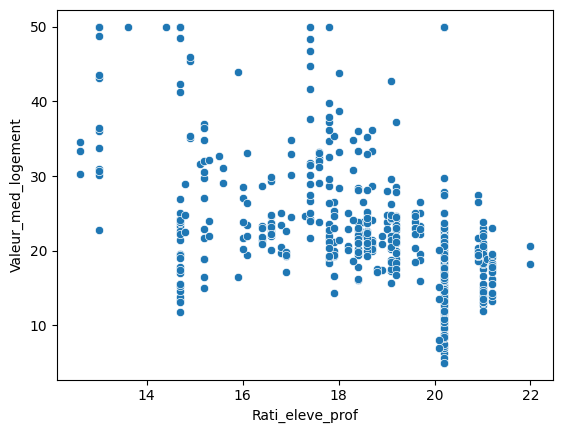

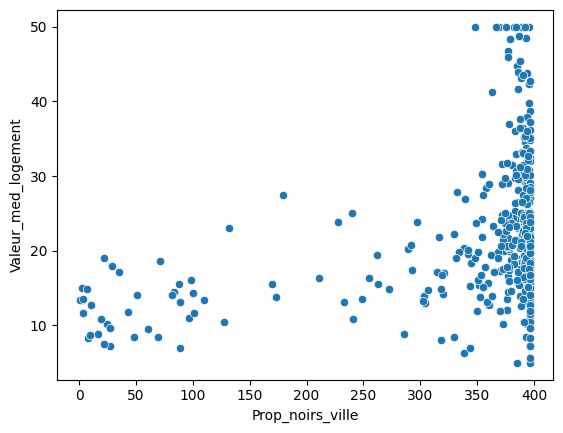

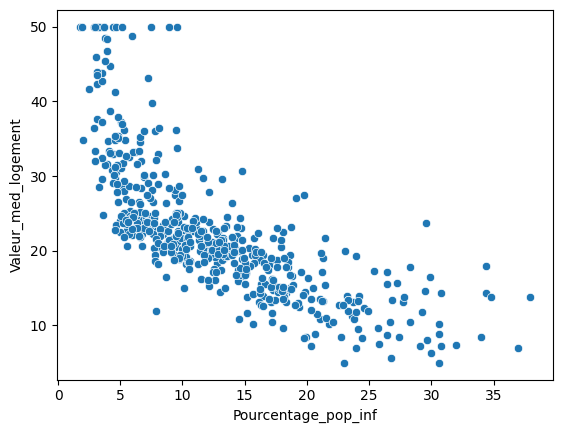

In [10]:
for i in df.columns[:-1]:
    sns.scatterplot(x=df[i],y=df['Valeur_med_logement'])
    plt.show()

<Axes: >

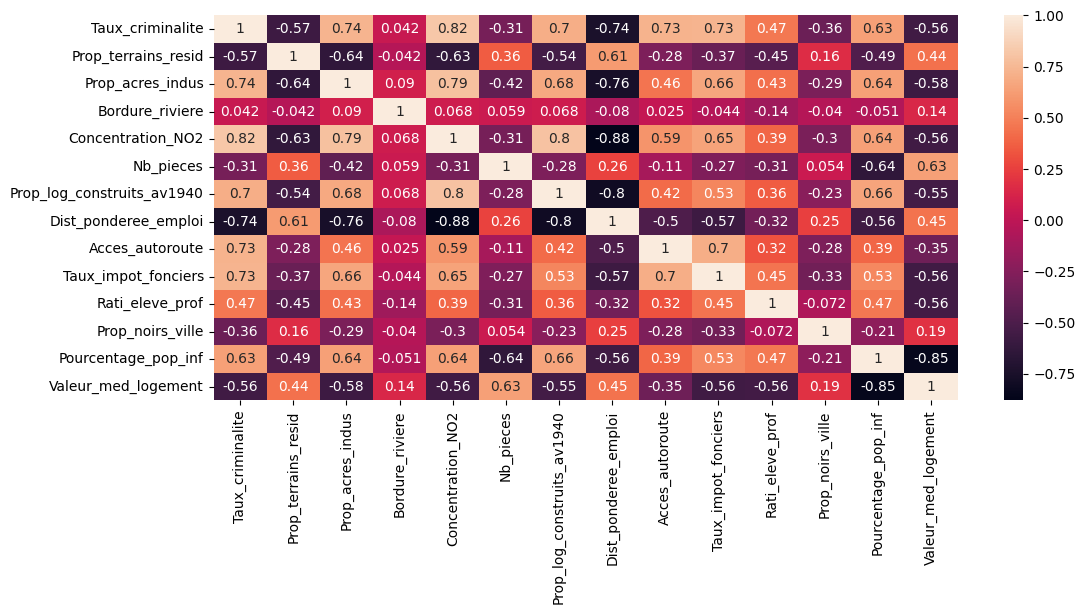

In [11]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(method='spearman'),annot=True)

<Axes: >

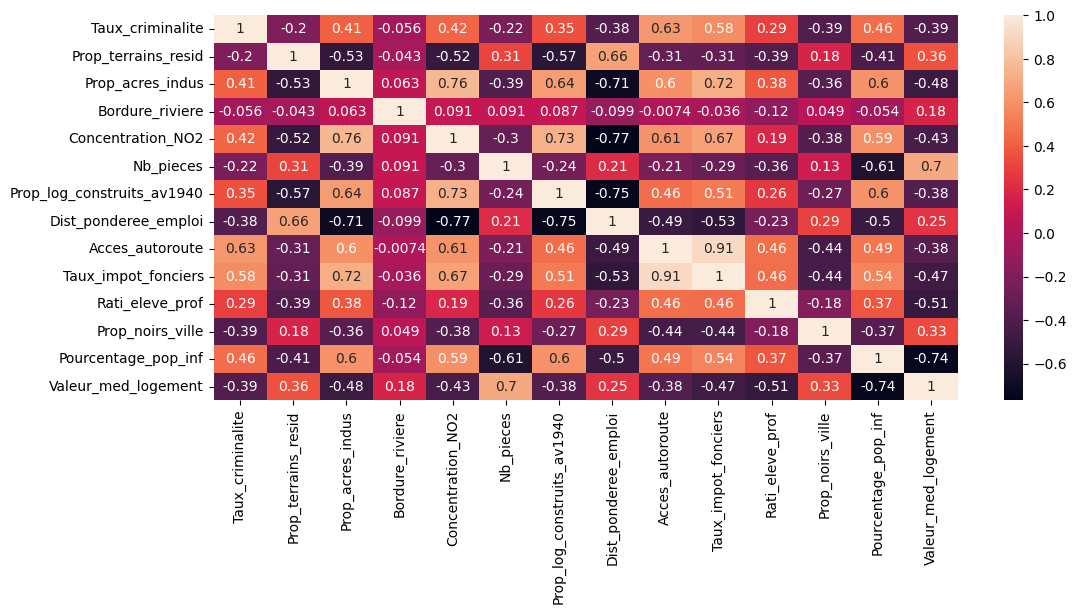

In [12]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

### hypotheses:
il existe des relations lineaire entre la variable <b>Valeur_med_logement</b> et les variables:Pourcentage_pop_inf,Nb_pieces,Rati_eleve_prof<br>
il existe des relations monotones entre la variable <b>Valeur_med_logement</b> et les variables:Taux_criminalite Prop_acres_indus,Concentration_NO2,Prop_log_construits_av1940,Taux_impot_fonciers   

### conclusions: au risque de se tromper de 5% toutes ces hypotheses sont vrai

In [13]:
# test de spearman
var=['Taux_criminalite','Prop_acres_indus','Concentration_NO2','Prop_log_construits_av1940','Taux_impot_fonciers','Pourcentage_pop_inf','Nb_pieces','Rati_eleve_prof']
for i in var:
    print(stats.spearmanr(df[i],df['Valeur_med_logement']))

SignificanceResult(statistic=-0.5588909488368801, pvalue=6.5533358892281775e-43)
SignificanceResult(statistic=-0.5782553852030439, pvalue=1.7372313174422242e-46)
SignificanceResult(statistic=-0.5626088297953195, pvalue=1.4059853091979118e-43)
SignificanceResult(statistic=-0.5475616874543465, pvalue=6.343734710404128e-41)
SignificanceResult(statistic=-0.5624106263737141, pvalue=1.5269740805039509e-43)
SignificanceResult(statistic=-0.8529141394922163, pvalue=2.221727524313283e-144)
SignificanceResult(statistic=0.6335764254337745, pvalue=3.822976266954402e-58)
SignificanceResult(statistic=-0.5559046822691174, pvalue=2.224971669470621e-42)


# 4-pretraitement des donees

## 4-1-Valeurs manquantes

In [14]:
df.isna().sum()

Taux_criminalite              0
Prop_terrains_resid           0
Prop_acres_indus              0
Bordure_riviere               0
Concentration_NO2             0
Nb_pieces                     0
Prop_log_construits_av1940    0
Dist_ponderee_emploi          0
Acces_autoroute               0
Taux_impot_fonciers           0
Rati_eleve_prof               0
Prop_noirs_ville              0
Pourcentage_pop_inf           0
Valeur_med_logement           0
dtype: int64

### conclusion : aucune valeur manquante

## 4-2-Outliers

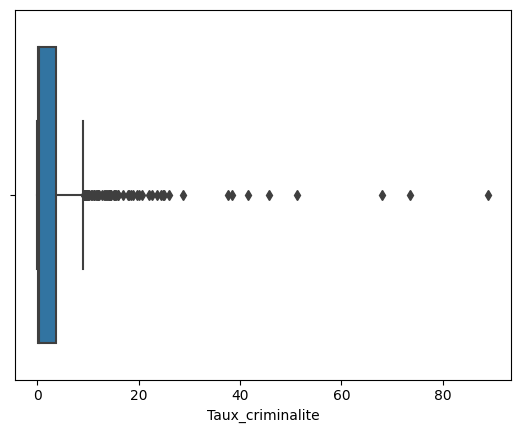

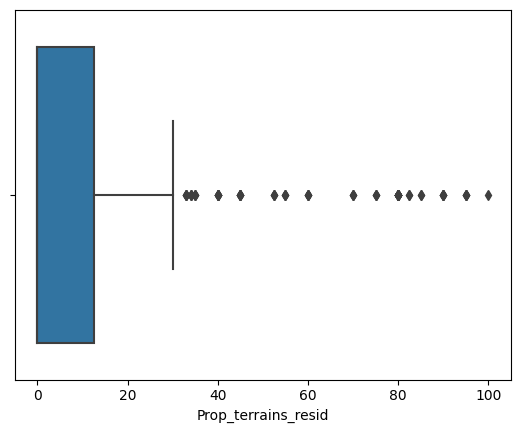

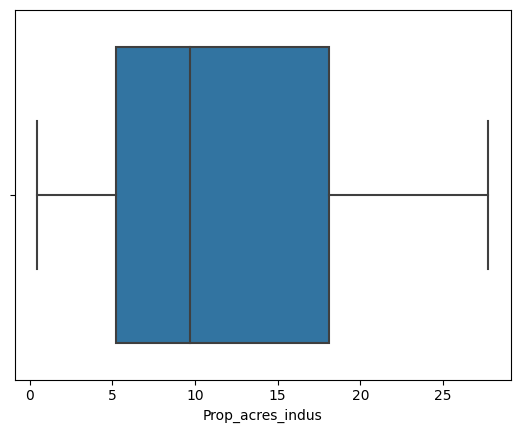

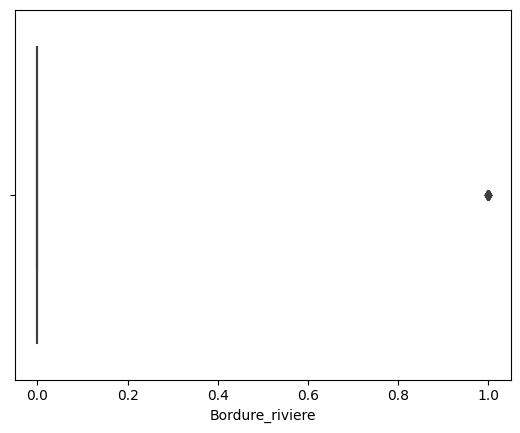

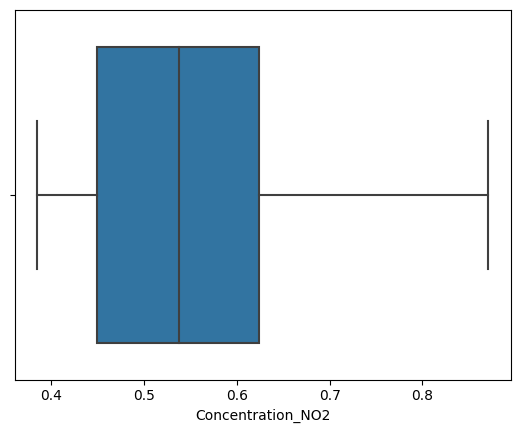

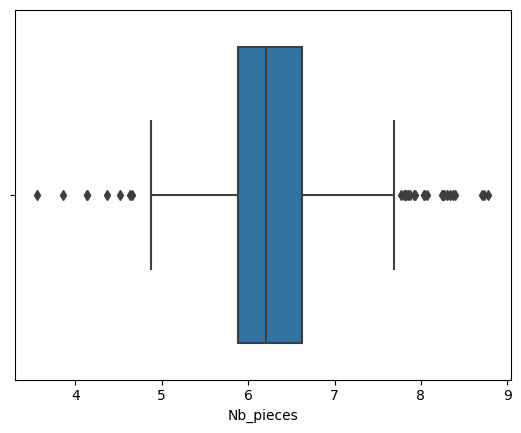

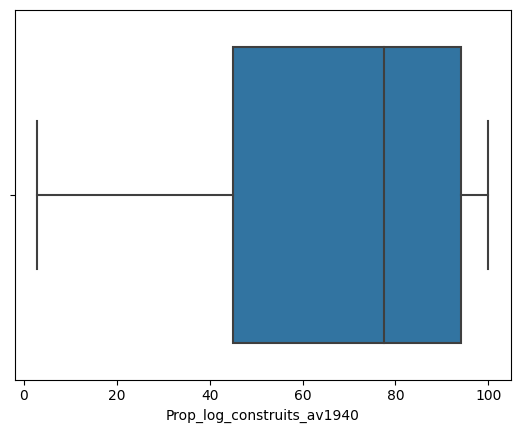

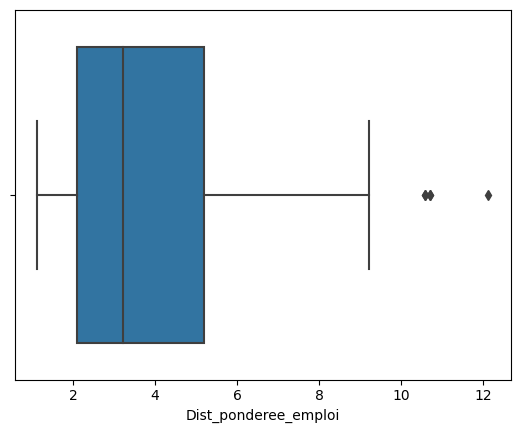

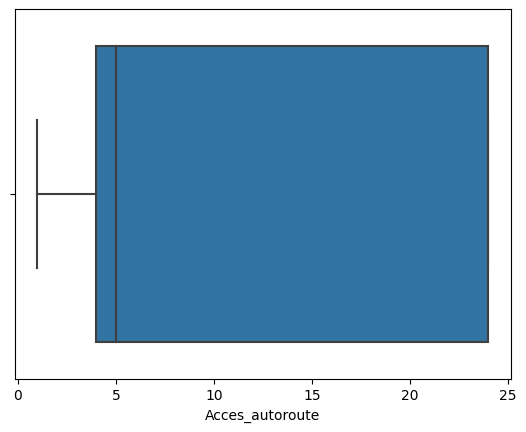

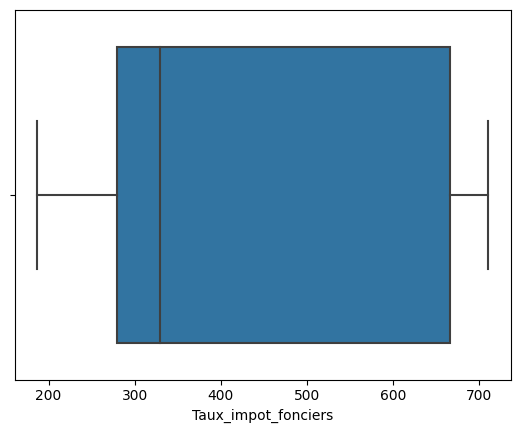

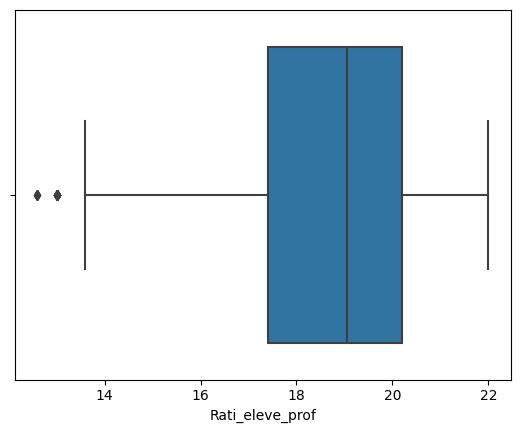

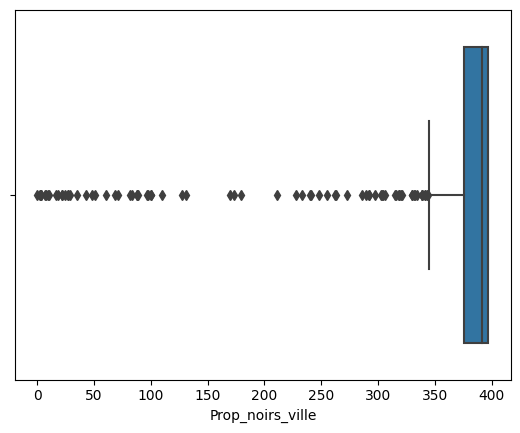

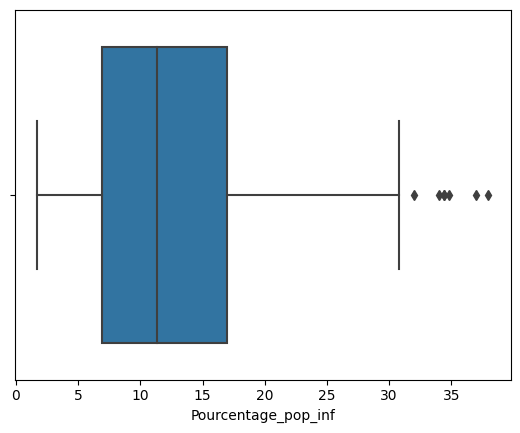

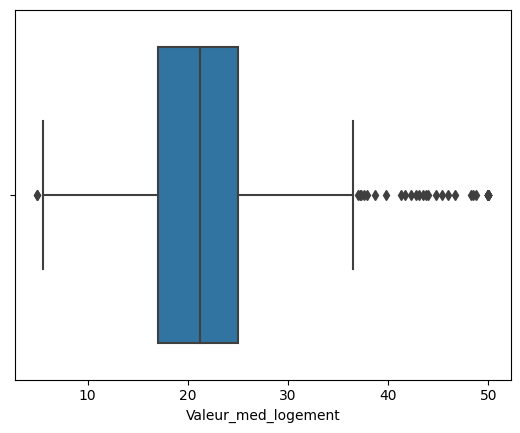

In [15]:
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.show()

### conclusions:
il y a des valeurs extremes considerables sur les variables :
 <ol>
    <li>Taux_criminalite</li>
    <li>Prop_terrains_resid</li>
    <li>Nb_pieces</li>
    <li>Dist_ponderee_emploi</li>
    <li>Prop_noirs_ville</li>
    <li>Pourcentage_pop_inf</li>
    <li>Valeur_med_logement</li>
  </ol>
### decision : aucun traitement a faire pour l'instant   

# 5-Selection de variables 

In [16]:
# division du dataset
train,test=train_test_split(df,test_size=0.2,random_state=42)

In [17]:
x_train=train.drop('Valeur_med_logement',axis=1)
y_train=train['Valeur_med_logement']

## 5-1-methodes par filtrage

### par la variance

/tmp/ipykernel_18/2917632647.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(x=x_train.columns[sorted_indices], height=variances[sorted_indices])


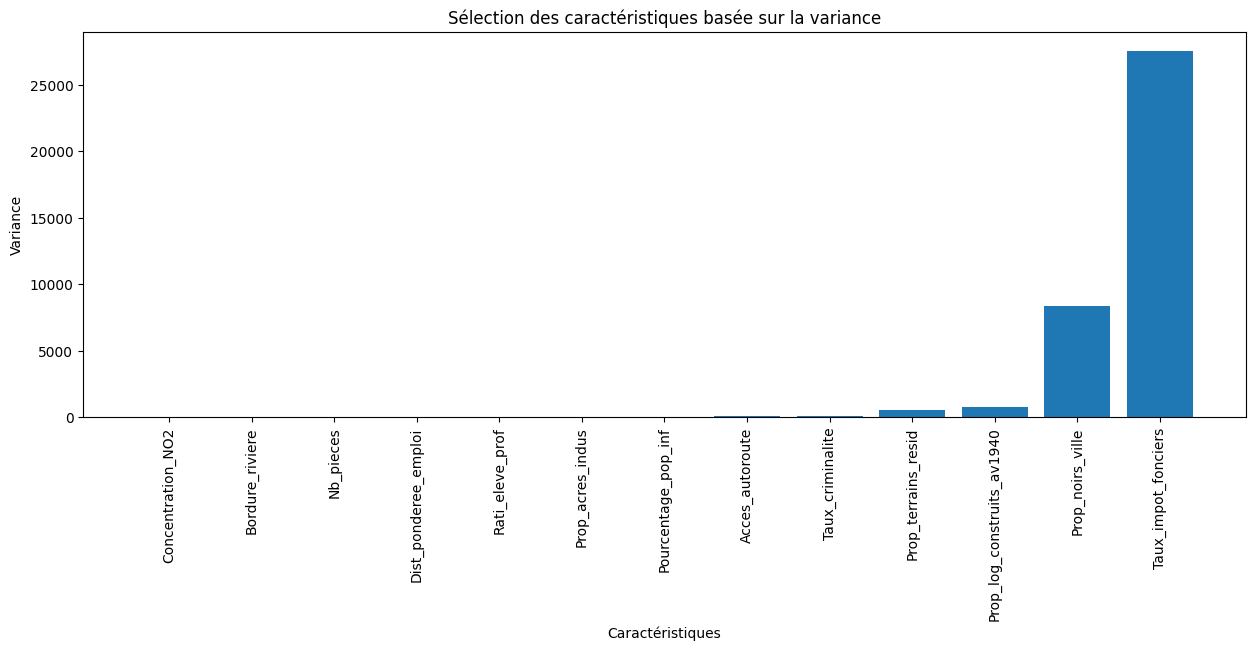

In [18]:
variances=np.var(x_train,axis=0)
sorted_indices=np.argsort(variances)
# print(variances[::-1])
# print(variances)
# print(sorted_indices)
# print(variances[sorted_indices])
# Afficher la courbe des variances
plt.figure(figsize=(15, 5))
plt.bar(x=x_train.columns[sorted_indices], height=variances[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Variance')
plt.title('Sélection des caractéristiques basée sur la variance')
plt.show()

In [19]:
from sklearn.feature_selection import VarianceThreshold
seuil=0.8*(1-0.8)
selector=VarianceThreshold(threshold=seuil)
x_hig_variance=selector.fit_transform(x_train)

# afficher les caracteristiques selectionnees
selected_columns=x_train.columns[selector.get_support()]
print(f'variables selectionnees: {selected_columns}')

variables selectionnees: Index(['Taux_criminalite', 'Prop_terrains_resid', 'Prop_acres_indus',
       'Nb_pieces', 'Prop_log_construits_av1940', 'Dist_ponderee_emploi',
       'Acces_autoroute', 'Taux_impot_fonciers', 'Rati_eleve_prof',
       'Prop_noirs_ville', 'Pourcentage_pop_inf'],
      dtype='object')


### par le kruskal wallis

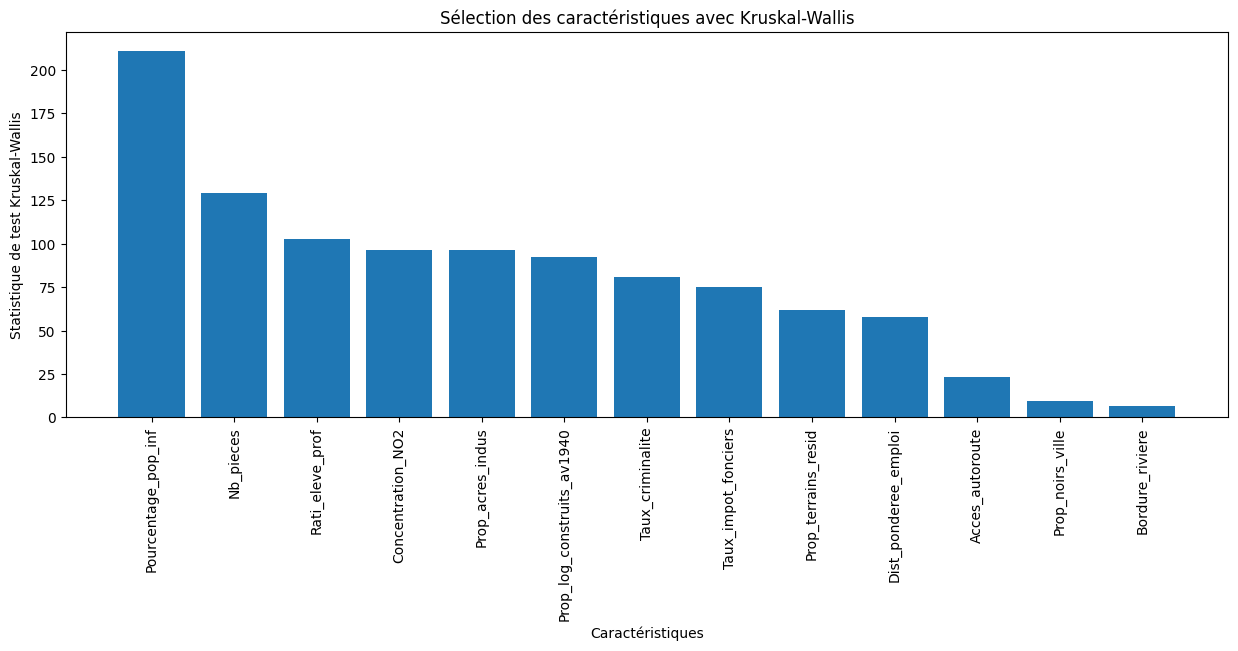

In [20]:
from scipy.stats import kruskal 
from sklearn.feature_selection import SelectKBest
# Séparer les données en deux groupes en fonction de la variable cible
group0 = x_train[y_train>np.median(y_train)]
group1 = x_train[y_train<np.median(y_train)]

# Appliquer la fonction SelectKBest avec Kruskal-Wallis pour sélectionner les k meilleures caractéristiques
selector = SelectKBest(score_func=lambda X, y: np.array([kruskal(group0.iloc[:, i], group1.iloc[:, i]).statistic for i in range(x_train.shape[1])]), k='all')
X_new = selector.fit_transform(x_train, y_train)
kruskal_scores = selector.scores_
sorted_indices = np.argsort(kruskal_scores)[::-1]

# Afficher la courbe des scores Kruskal-Wallis
plt.figure(figsize=(15, 5))
plt.bar(x=x_train.columns[sorted_indices], height=kruskal_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Statistique de test Kruskal-Wallis')
plt.title('Sélection des caractéristiques avec Kruskal-Wallis')
plt.show()

In [21]:
y_train=train['Valeur_med_logement']

In [22]:
best_features = SelectKBest(score_func=lambda x, y: np.apply_along_axis(lambda x: kruskal(x, y).statistic, 0, x), k=10)
X_new = best_features.fit_transform(x_train, y_train)
selected_features = x_train.columns[best_features.get_support()]

print('Les meilleures caractéristiques sont :', selected_features)

Les meilleures caractéristiques sont : Index(['Taux_criminalite', 'Prop_acres_indus', 'Bordure_riviere',
       'Concentration_NO2', 'Nb_pieces', 'Prop_log_construits_av1940',
       'Dist_ponderee_emploi', 'Acces_autoroute', 'Taux_impot_fonciers',
       'Prop_noirs_ville'],
      dtype='object')


### Methode manuel par analyse de correlations 

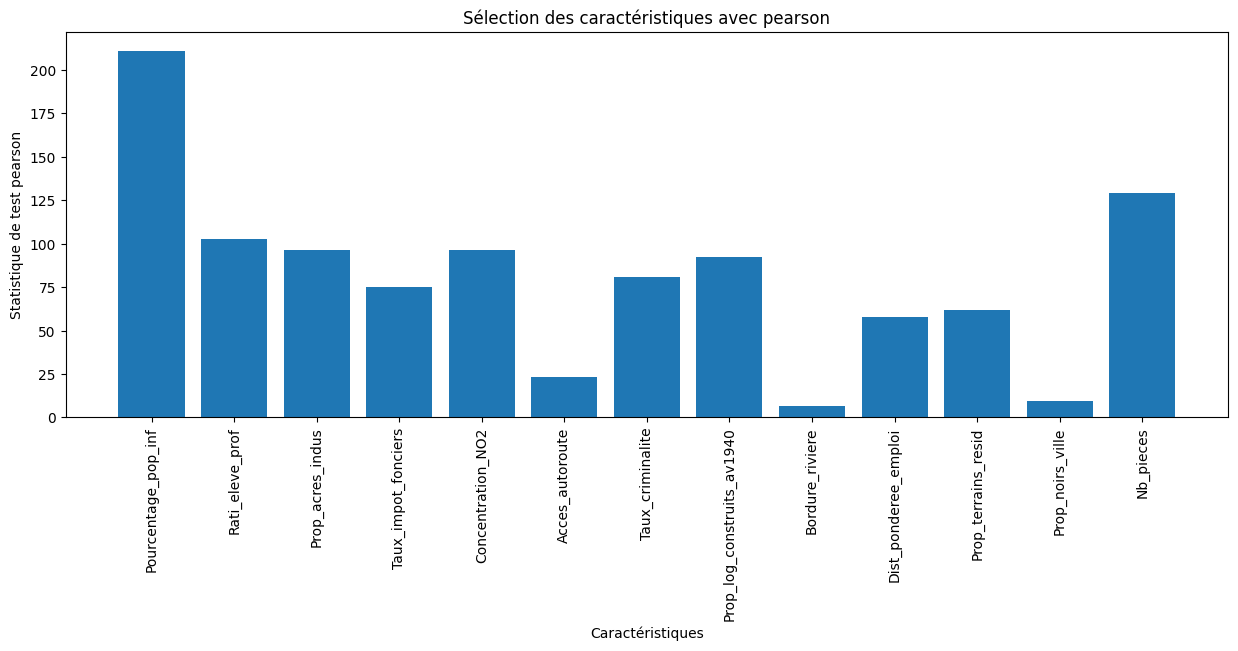

In [23]:
# Appliquer la fonction SelectKBest avec Kruskal-Wallis pour sélectionner les k meilleures caractéristiques
selector = SelectKBest(score_func=lambda X, y: np.array([stats.pearsonr(x_train[train.columns[i]],y_train).statistic for i in range(x_train.shape[1])]), k='all')
X_new = selector.fit_transform(x_train, y_train)
person_scores = selector.scores_
sorted_indices = np.argsort(person_scores)

# Afficher la courbe des scores Kruskal-Wallis
plt.figure(figsize=(15, 5))
plt.bar(x=x_train.columns[sorted_indices], height=kruskal_scores[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Statistique de test pearson')
plt.title('Sélection des caractéristiques avec pearson')
plt.show()

In [24]:
selector = SelectKBest(score_func=lambda X, y: np.array([stats.pearsonr(x_train[train.columns[i]],y_train).statistic for i in range(x_train.shape[1])]), k=10)
X_new = selector.fit_transform(x_train, y_train)
selected_features2 = x_train.columns[selector.get_support()]

print('Les meilleures caractéristiques sont :', selected_features2)

Les meilleures caractéristiques sont : Index(['Taux_criminalite', 'Prop_terrains_resid', 'Bordure_riviere',
       'Concentration_NO2', 'Nb_pieces', 'Prop_log_construits_av1940',
       'Dist_ponderee_emploi', 'Acces_autoroute', 'Taux_impot_fonciers',
       'Prop_noirs_ville'],
      dtype='object')


In [25]:
correlation_matrix=df.corr()
correlation_vector=abs(correlation_matrix['Valeur_med_logement'][:-1]).sort_values(ascending=False)
correlation_vector

Pourcentage_pop_inf           0.737663
Nb_pieces                     0.695360
Rati_eleve_prof               0.507787
Prop_acres_indus              0.483725
Taux_impot_fonciers           0.468536
Concentration_NO2             0.427321
Taux_criminalite              0.388305
Acces_autoroute               0.381626
Prop_log_construits_av1940    0.376955
Prop_terrains_resid           0.360445
Prop_noirs_ville              0.333461
Dist_ponderee_emploi          0.249929
Bordure_riviere               0.175260
Name: Valeur_med_logement, dtype: float64

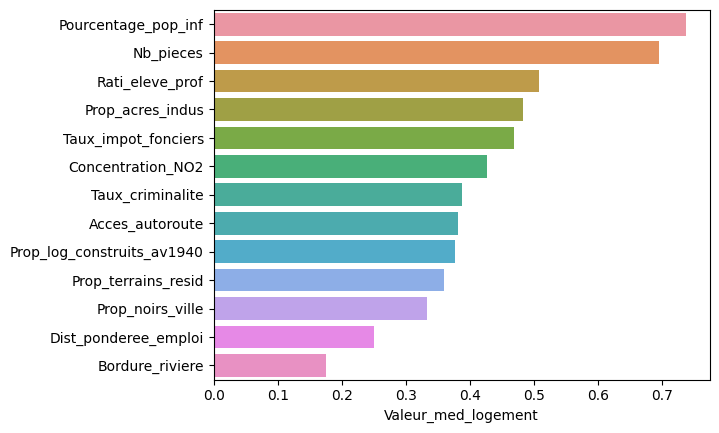

In [26]:
for i in correlation_vector.index:
    sns.barplot(x=correlation_vector,y=correlation_vector.index)

In [27]:
#selction des variables les plus correlees
selected_features=correlation_vector[abs(correlation_vector)>0.55].index
selected_features

Index(['Pourcentage_pop_inf', 'Nb_pieces'], dtype='object')

In [28]:
correlation_matrix

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces,Prop_log_construits_av1940,Dist_ponderee_emploi,Acces_autoroute,Taux_impot_fonciers,Rati_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
Taux_criminalite,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
Prop_terrains_resid,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
Prop_acres_indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
Bordure_riviere,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
Concentration_NO2,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
Nb_pieces,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
Prop_log_construits_av1940,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
Dist_ponderee_emploi,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
Acces_autoroute,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
Taux_impot_fonciers,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [29]:
# evitez la multicolinearite
out_var=[]
for i in train.columns[:-1]:
    for j in train.columns[:-1]:
        if i!=j:
            if abs(correlation_matrix[i][j])>=0.7:
                out_var.append((i,j))
out_var

[('Prop_acres_indus', 'Concentration_NO2'),
 ('Prop_acres_indus', 'Dist_ponderee_emploi'),
 ('Prop_acres_indus', 'Taux_impot_fonciers'),
 ('Concentration_NO2', 'Prop_acres_indus'),
 ('Concentration_NO2', 'Prop_log_construits_av1940'),
 ('Concentration_NO2', 'Dist_ponderee_emploi'),
 ('Prop_log_construits_av1940', 'Concentration_NO2'),
 ('Prop_log_construits_av1940', 'Dist_ponderee_emploi'),
 ('Dist_ponderee_emploi', 'Prop_acres_indus'),
 ('Dist_ponderee_emploi', 'Concentration_NO2'),
 ('Dist_ponderee_emploi', 'Prop_log_construits_av1940'),
 ('Acces_autoroute', 'Taux_impot_fonciers'),
 ('Taux_impot_fonciers', 'Prop_acres_indus'),
 ('Taux_impot_fonciers', 'Acces_autoroute')]

# 5-2-Methode automatiques

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
clf=LinearRegression()
rfe = RFECV(clf, step=1, cv=5,scoring='neg_mean_squared_error')
rf= rfe.fit_transform(x_train, y_train)
print("\nRecursive Feature Elimination: \nMeilleures caractéristiques:", x_train.columns[np.where(rfe.support_)[0]], "\nMeilleur score:", rfe.score(x_train,y_train))


Recursive Feature Elimination: 
Meilleures caractéristiques: Index(['Taux_criminalite', 'Prop_terrains_resid', 'Prop_acres_indus',
       'Bordure_riviere', 'Concentration_NO2', 'Nb_pieces',
       'Prop_log_construits_av1940', 'Dist_ponderee_emploi', 'Acces_autoroute',
       'Taux_impot_fonciers', 'Rati_eleve_prof', 'Prop_noirs_ville',
       'Pourcentage_pop_inf'],
      dtype='object') 
Meilleur score: 0.7508856358979673


In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sbs = SFS(clf, k_features='best', forward=False, floating=False, scoring='neg_mean_squared_error', cv=5)
sbs = sbs.fit(x_train, y_train)
print("\nBackward Elimination: \nMeilleures caractéristiques:", train.columns[list(sbs.k_feature_idx_)], "\nMeilleur score:", sbs.k_score_)
sel_var=train.columns[list(sbs.k_feature_idx_)]


Backward Elimination: 
Meilleures caractéristiques: Index(['Taux_criminalite', 'Bordure_riviere', 'Concentration_NO2', 'Nb_pieces',
       'Dist_ponderee_emploi', 'Acces_autoroute', 'Taux_impot_fonciers',
       'Rati_eleve_prof', 'Prop_noirs_ville', 'Pourcentage_pop_inf'],
      dtype='object') 
Meilleur score: -23.524888220756317


# 6-entrainement du model

In [32]:
from sklearn.metrics import r2_score, mean_squared_error
x_test=test.drop('Valeur_med_logement',axis=1)
y_test=test['Valeur_med_logement']
model=sm.OLS(y_train,sm.add_constant(x_train)).fit()

# 7-Evaluation de la performance

In [33]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                 OLS                   Adj. R-squared:       0.743    
Dependent Variable:    Valeur_med_logement   AIC:                  2416.6443
Date:                  2024-05-23 11:01      BIC:                  2472.6641
No. Observations:      404                   Log-Likelihood:       -1194.3  
Df Model:              13                    F-statistic:          90.43    
Df Residuals:          390                   Prob (F-statistic):   6.21e-109
R-squared:             0.751                 Scale:                22.418   
----------------------------------------------------------------------------
                            Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
----------------------------------------------------------------------------
const                       30.2468   5.6768  5.3281 0.0000  19.0858 41.4077
Taux_criminalite            -0.1131   0.0348 -3.2502 0.0013  -0.1814 -0.0447
Prop_terrains_resid          0.0301   0.0160  1.8824 0.0605  -0.0013  0.0616
Prop_acres_indus             0.0404   0.0674  0.5994 0.5492  -0.0921  0.1728
Bordure_riviere              2.7844   0.9557  2.9135 0.0038   0.9055  4.6634
Concentration_NO2          -17.2026   4.2361 -4.0609 0.0001 -25.5311 -8.8741
Nb_pieces                    4.4388   0.4640  9.5669 0.0000   3.5266  5.3510
Prop_log_construits_av1940  -0.0063   0.0146 -0.4322 0.6658  -0.0349  0.0223
Dist_ponderee_emploi        -1.4479   0.2260 -6.4079 0.0000  -1.8921 -1.0036
Acces_autoroute              0.2624   0.0760  3.4536 0.0006   0.1130  0.4118
Taux_impot_fonciers         -0.0106   0.0042 -2.5083 0.0125  -0.0190 -0.0023
Rati_eleve_prof             -0.9155   0.1440 -6.3575 0.0000  -1.1986 -0.6323
Prop_noirs_ville             0.0124   0.0030  4.1656 0.0000   0.0065  0.0182
Pourcentage_pop_inf         -0.5086   0.0557 -9.1332 0.0000  -0.6180 -0.3991
----------------------------------------------------------------------------
Omnibus:                 133.052          Durbin-Watson:             2.114  
Prob(Omnibus):           0.000            Jarque-Bera (JB):          579.817
Skew:                    1.379            Prob(JB):                  0.000  
Kurtosis:                8.181            Condition No.:             14894  
============================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [34]:
# predictions
y_train_predict=model.predict(sm.add_constant(x_train))
y_test_predict=model.predict(sm.add_constant(x_test))


In [35]:
# verification over/under fitting
# obtention des metrics
r2_train=r2_score(y_train,y_train_predict)
r2_test=r2_score(y_test,y_test_predict)
mse_train=mean_squared_error(y_train,y_train_predict)
mse_test=mean_squared_error(y_test,y_test_predict)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)

Metrics=pd.DataFrame({
    'Metrics':['R2','MSE','RMSE'],
    'Train':[r2_train,mse_train,rmse_train],
    'Test':[r2_test,mse_test,rmse_test]
})
Metrics

,Metrics,Train,Test
0,R2,0.750886,0.668759
1,MSE,21.641413,24.291119
2,RMSE,4.652033,4.928602


# 8- Validation des hypotheses

## 8-1-linearite: non verifie car il existe des relation non lineaires entre y et les differents x

## 8-2-homoscedasticite: verifiee

Text(0.5, 1.0, "Test d'homoscedacticite")

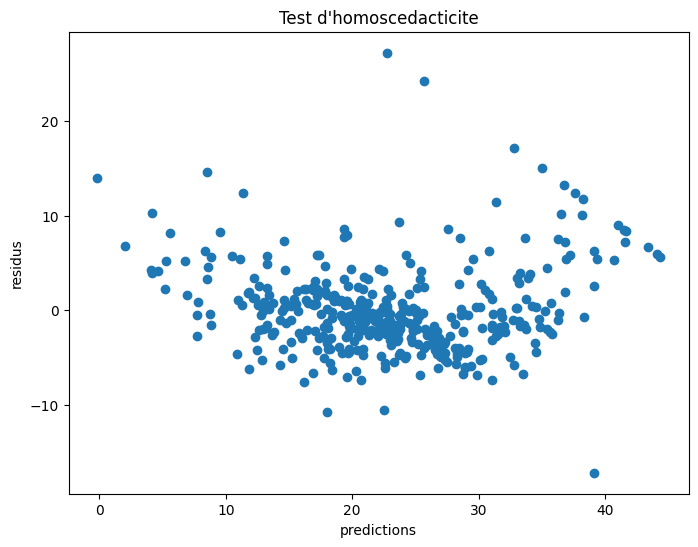

In [36]:
# verification graphique
residus=y_train-y_train_predict
plt.figure(figsize=(8,6))
plt.scatter(y_train_predict,residus)
plt.xlabel('predictions')
plt.ylabel('residus')
plt.title('Test d\'homoscedacticite')

## 8-3-multicolinearite: non verifiee

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['features']=x_train.columns
vif

,VIF Factor,features
0,1.987996,Taux_criminalite
1,3.075814,Prop_terrains_resid
2,13.741418,Prop_acres_indus
3,1.181392,Bordure_riviere
4,74.807051,Concentration_NO2
5,77.536575,Nb_pieces
6,20.885660,Prop_log_construits_av1940
7,15.299778,Dist_ponderee_emploi
8,15.204351,Acces_autoroute
9,60.960907,Taux_impot_fonciers


## 8-4-Normalite des termes d'erreurs: non verifiee


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

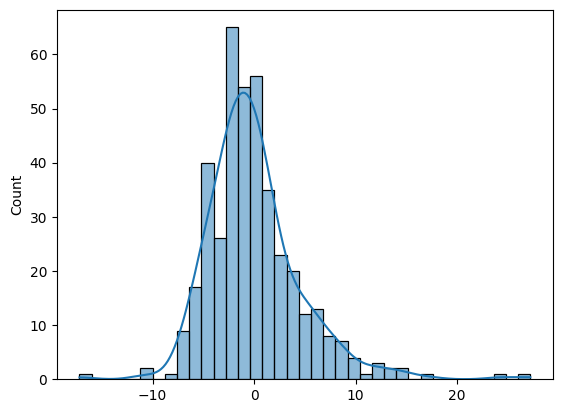

In [38]:
sns.histplot(residus,kde=True)

In [39]:
# test de shapiro
stats.shapiro(residus)

ShapiroResult(statistic=0.9117937684059143, pvalue=1.3221250029298807e-14)

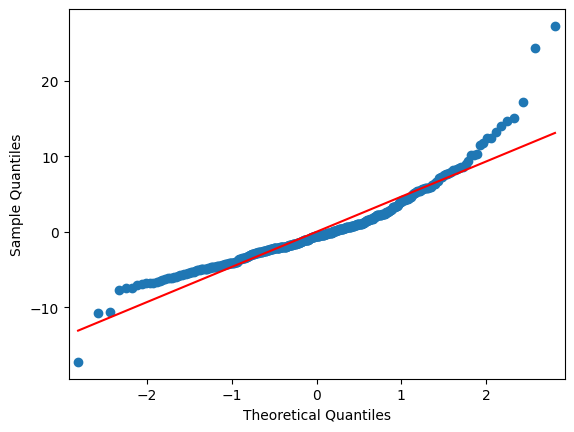

In [40]:
# QQplot
sm.qqplot(residus,line='s')
plt.show()

## 8-5 Autocorrelation: verifiee .sauf en cas de series temporelles

## 8-6 Nulite de l'esperance des erreurs: verifiee

In [41]:
residus.mean()

-2.8412915584664403e-14

# 9-Resolution des hypotheses

In [42]:
# evitez la multicolinearite
out_var=[]
for i in train.columns[:-1]:
    for j in train.columns[:-1]:
        if i!=j:
            if abs(correlation_matrix[i][j])>=0.7:
                out_var.append((i,j))
out_var

[('Prop_acres_indus', 'Concentration_NO2'),
 ('Prop_acres_indus', 'Dist_ponderee_emploi'),
 ('Prop_acres_indus', 'Taux_impot_fonciers'),
 ('Concentration_NO2', 'Prop_acres_indus'),
 ('Concentration_NO2', 'Prop_log_construits_av1940'),
 ('Concentration_NO2', 'Dist_ponderee_emploi'),
 ('Prop_log_construits_av1940', 'Concentration_NO2'),
 ('Prop_log_construits_av1940', 'Dist_ponderee_emploi'),
 ('Dist_ponderee_emploi', 'Prop_acres_indus'),
 ('Dist_ponderee_emploi', 'Concentration_NO2'),
 ('Dist_ponderee_emploi', 'Prop_log_construits_av1940'),
 ('Acces_autoroute', 'Taux_impot_fonciers'),
 ('Taux_impot_fonciers', 'Prop_acres_indus'),
 ('Taux_impot_fonciers', 'Acces_autoroute')]

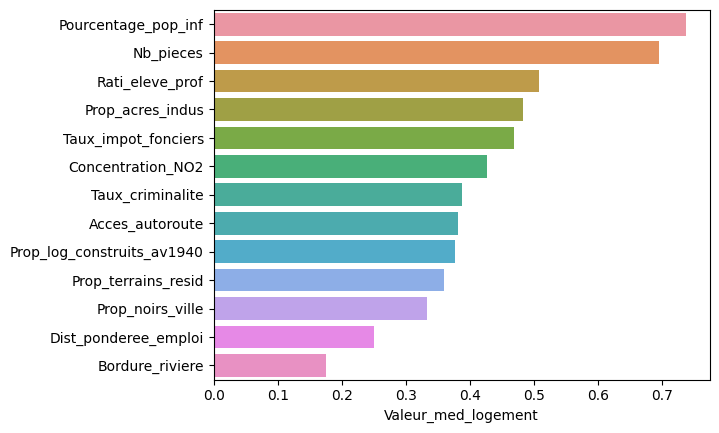

In [43]:
for i in correlation_vector.index:
    sns.barplot(x=correlation_vector,y=correlation_vector.index)

In [44]:
df_test=train[selected_features]

In [45]:
selected_features

Index(['Pourcentage_pop_inf', 'Nb_pieces'], dtype='object')

In [46]:
model2=sm.OLS(y_train,sm.add_constant(df_test)).fit()

In [47]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(df_test.values,i) for i in range (df_test.shape[1])]
vif['features']=df_test.columns
vif

,VIF Factor,features
0,3.206039,Pourcentage_pop_inf
1,3.206039,Nb_pieces


In [48]:
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS                 Adj. R-squared:     0.648    
Dependent Variable: Valeur_med_logement AIC:                2531.8289
Date:               2024-05-23 11:01    BIC:                2543.8331
No. Observations:   404                 Log-Likelihood:     -1262.9  
Df Model:           2                   F-statistic:        372.6    
Df Residuals:       401                 Prob (F-statistic): 3.52e-92 
R-squared:          0.650               Scale:              30.619   
---------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025   0.975]
---------------------------------------------------------------------
const               -3.8412   3.5230  -1.0903 0.2762 -10.7670  3.0847
Pourcentage_pop_inf -0.6325   0.0490 -12.8962 0.0000  -0.7289 -0.5361
Nb_pieces            5.4651   0.4916  11.1181 0.0000   4.4988  6.4314
---------------------------------------------------------------------
Omnibus:              110.550        Durbin-Watson:           2.182  
Prob(Omnibus):        0.000          Jarque-Bera (JB):        348.167
Skew:                 1.242          Prob(JB):                0.000  
Kurtosis:             6.810          Condition No.:           198    
=====================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
"""

In [49]:
selected_features=['Taux_criminalite',
       'Nb_pieces',
       'Dist_ponderee_emploi', 'Acces_autoroute']

In [50]:
# selected_features.append('Prop_terrains_resid')

In [51]:
selected_features

['Taux_criminalite', 'Nb_pieces', 'Dist_ponderee_emploi', 'Acces_autoroute']

In [52]:
#linearite
# tranformations
from scipy.stats import boxcox , yeojohnson

In [53]:
df_test2=df_test
# df_test3=pd.DataFrame()
# for i in df_test2.columns:
#     y_yo,_=yeojohnson(df_test2[i])
#     df_test3[i]=y_yo

In [54]:
df_test2=np.power(df_test2,0.77)

In [55]:
# df_test2['Valeur_med']=y_train

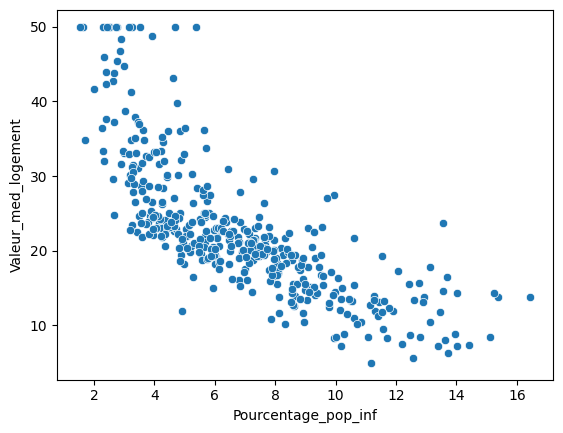

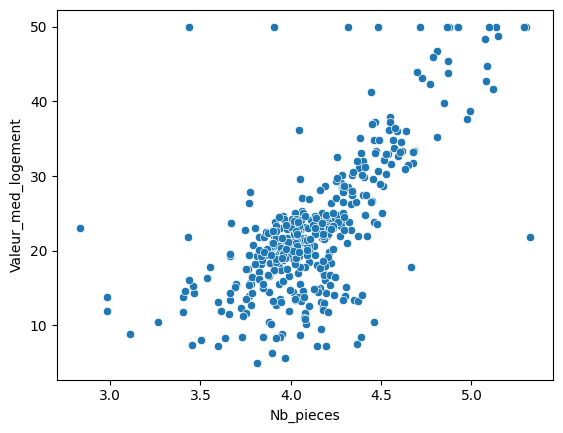

In [56]:
for i in df_test.columns :
    sns.scatterplot(x=df_test2[i],y=y_train)
    plt.show()

<Axes: >

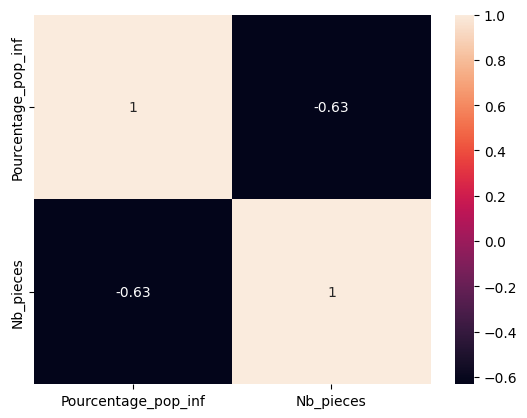

In [57]:
sns.heatmap(df_test2.corr(),annot=True)

In [58]:
# normalite des termes d'erreur

In [59]:
model3=sm.OLS(y_train,sm.add_constant(df_test2)).fit()

In [60]:
resid=y_train-model3.predict(sm.add_constant(df_test2))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

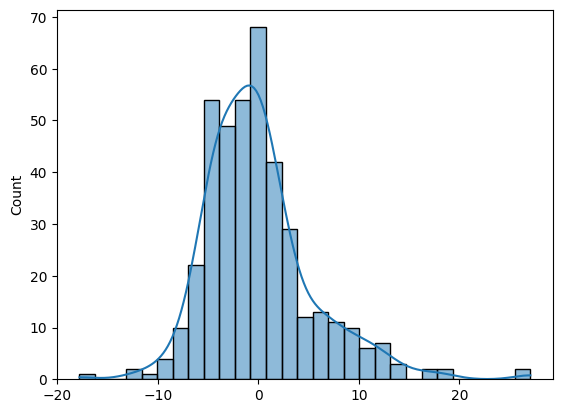

In [61]:
sns.histplot(resid,kde=True)

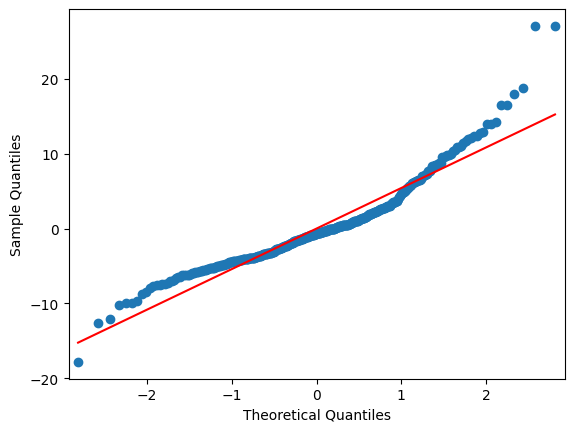

In [62]:
# QQplot
sm.qqplot(resid,line='s')
plt.show()

In [63]:
# test de shapiro
stats.shapiro(resid)

ShapiroResult(statistic=0.9226152896881104, pvalue=1.406542525679566e-13)